In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib notebook
%matplotlib inline

In [97]:
sns.set_theme(context='notebook', style='darkgrid', 
                  palette='deep', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)

df = pd.read_csv('monitor_project.csv', index_col=0)
df.head(1)

,model_name,model_title,price,rating_count,avg_rating,Screen Size,Color Gamut (Typ.),Aspect Ratio,Display Resolution,Resolution,...,1ms Motion Blur Reduction,Display Type,Super Resolution+,Curved,freesync,freesync_premium,freesync_premium_pro,HDR,response_time_ms,refresh_rate(hz)
0,27UP650-W,LG 27” UHD IPS Monitor with VESA DisplayHDR 40...,450.0,0.0,NaN,27.0,DCI-P3 95% (CIE1976),16:9,UHD,3840 x 2160,...,0,IPS,0,0,1,0,0,1,5,60


In [98]:
df.info()
df.drop('Headphone Out', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   model_name                      20 non-null     object 
 1   model_title                     20 non-null     object 
 2   price                           20 non-null     float64
 3   rating_count                    20 non-null     float64
 4   avg_rating                      14 non-null     float64
 5   Screen Size                     20 non-null     float64
 6   Color Gamut (Typ.)              20 non-null     object 
 7   Aspect Ratio                    20 non-null     object 
 8   Display Resolution              20 non-null     object 
 9   Resolution                      20 non-null     object 
 10  Brightness                      20 non-null     object 
 11  Contrast Ratio                  20 non-null     object 
 12  Surface Treatment               17 non

### First exploratory plot
I put together this graph as a way to tie in several elements that are important to my selection across all of the monitors in my dataset to get an overview of the selection field. For this overview I chose to use screen size vs price instead of average review vs price for the simple reason that not all monitors had reviews and I want this overview to show the entire selection field. 

Right away we can see by the price positioning that there is at least one major outlier that is going to disrupt my data analyzation and the Hue of that monitor gives us a good idea why. At \\$4000, the monitor in question is more than double the price of the next most expensive monitor, and that is likely because it is the only monitor in the group that uses a brand new [panel technology](https://www.oled-info.com/oled-monitor) that is expensive across other brands as well. I have no intention to even consider spending \\$4k for a monitor so I am going to drop this monitor to avoid having it skew the value of the metrics across the other monitors. 

A second, semi-outlier is by screen size. At 49", this monitor is almost 30% bigger than the next biggest monitor. While I also have no intention of getting a monitor that is wider than my current desk, it seems like this monitor might actually be underpriced for what it offers and wont skew my attempts to capture price values for different features in the way that the first outlier will. And, with only 19 monitors left, I dont want to get rid of another data point unless I have to, so I will keep this one for now.

One interesting point is that none of these regression lines pass through the origin as you would expect in a pure linear relationship. In fact, the last graph intersects at less than -$2000! Obviously buying a tiny screen doesnt result in a negative payment, but [this article](https://dynamicecology.wordpress.com/2017/04/13/dont-force-your-regression-through-zero-just-because-you-know-the-true-intercept-has-to-be-zero/) does a great job of making the argument that a good linear regression model really only needs to be accurate over the range of values that are in consideration, since in reality there are more factors at play that a simple regression cant hope to accurately capture. 

Graph 0 intersects y axis at -$1,347
Graph 1 intersects y axis at -$1,250
Graph 2 intersects y axis at -$2,097


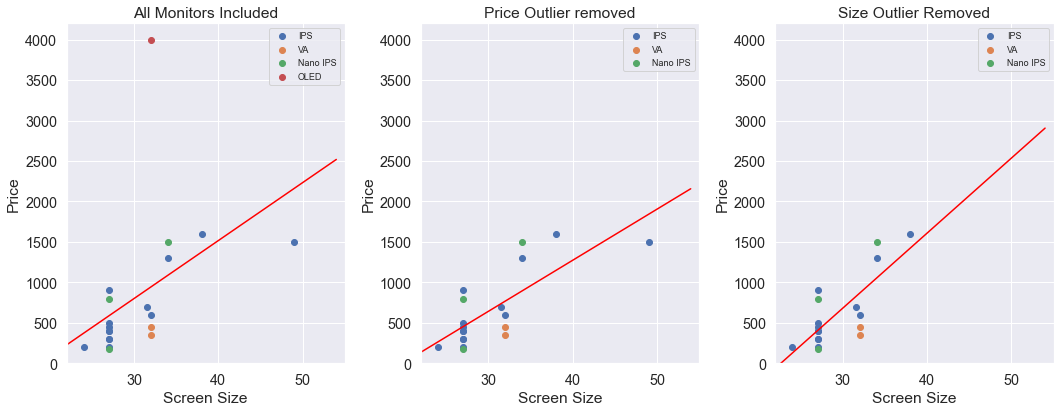

In [107]:
price_outlier_removed = df.drop(15, axis=0).copy()
size_outlier_removed = df.drop([15,17], axis=0).copy()

list_of_dfs = [df, price_outlier_removed, size_outlier_removed]
list_of_titles = ['All Monitors Included',
                  'Price Outlier removed', 
                  'Size Outlier Removed']

def overview_chart(df_list):
    """plot screen size vs Price scatter charts for monitor dataframes with regression line and panel types broken out"""

    n_plots = len(df_list)
    fig = plt.figure(figsize=(15,6))
    
    #loop to create charts for each df in entered list of dfs
    for i, df in enumerate(df_list):
        #breaking out display types to plot them with different colored markers
        display_types = list(df['Display Type'].unique())
        #subplots 1 row, with x cols
        plt.subplot(1,n_plots,i+1)
        # using loop to plot each display type separately for each df
        for d_type in display_types:
            mask = df['Display Type']==d_type
            plt.scatter(x=df['Screen Size'][mask], y=df['price'][mask], label=d_type)
            plt.xlabel('Screen Size')
            plt.ylabel('Price')
            plt.title(list_of_titles[i])
        # draw regression line (only one needed per df chart)
        x = df['Screen Size']
        y = df['price']
        m, b = np.polyfit(x, y, 1)
        a = np.arange(22,55,1)
        plt.plot(a, m*a + b, color='red')
        plt.xlim(22,55)
        plt.ylim(0,4200)
        plt.legend(fontsize='xx-small')
        print(f'Graph {i} intersects y axis at -${-b:,.0f}')
    plt.tight_layout()
    plt.show()
    
overview_chart(list_of_dfs)

In [109]:
#removing the outlier monitor and saving to new df

data = df.drop(15, axis=0).reset_index(drop=True).copy()
data.shape

(19, 40)

Next thoughts

- describe in depth what I am looking for in the "best" monitor. 
    - I want a monitor with good clarity, and features to make it easier on my eyes
    - I want a monitor that provides me with more screen room so that I dont have to scroll and switch tabs as much
        - right now I think that means both height and width (ie not an UW monitor) but value is a bigger factor
    - I would like a monitor with speakers for listening to you tube videos
    - I want to pay as little as possible:
        - I dont need gaming performance features
        - I dont need high performance color range or accuracy
        - I dont need a "huge" monitor or extra features
    
- find measures of tendencies. 
    - what do these columns really mean? 
    - how do they relate to my requirements?
    - how do they relate to the things that I care about for defining "best"?  (if measure goes up is it more "best"?)

- look at feature distributions, histograms, quartile performances, measures of spread (std)
- maybe compare total actual screen area (HxW) to see how ratio affects price. 
- compare measures of clarity for UW vs regular aspect monitors, see if clarity is more expensive in one 